In [1]:
import random
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import joblib

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog


from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

PATH TO DATASET

In [2]:
dataset_path = "CK+48"

Read the Dataset with imutils package

In [3]:
from imutils import paths
imagePaths = list(paths.list_images('CK+48'))
imagePaths
emotion_labels = sorted(os.listdir(dataset_path))
print(f"[INFO] Classes: {emotion_labels}")

[INFO] Classes: ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


Show samples of FER dataset

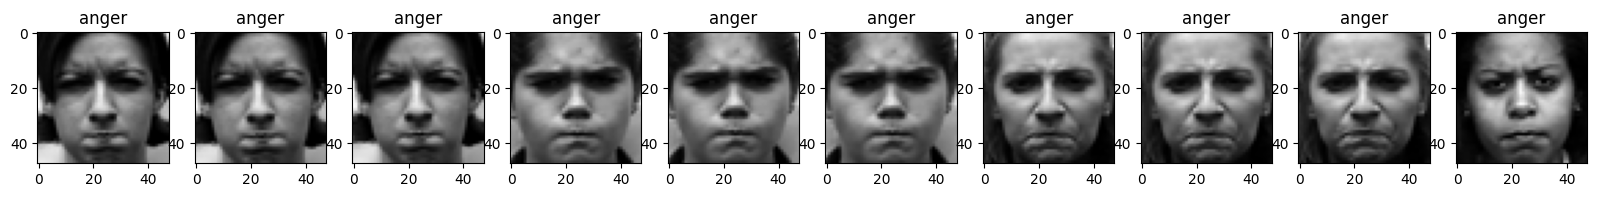

In [4]:
fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.array(cv2.imread(imagePaths[i])), cmap='gray')
    label = imagePaths[i].split(os.path.sep)[-2]
    plt.title(label)

plt.show()

PREPROCESSING AND FEATURE EXTRACTION

Read and convert images into gray-scale

In [5]:
def colortogray(im):
    image = cv2.imread(im)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray

Resize images with a fixed size(INTER LINEAR interpolation)

In [6]:
def resizeImage(image, size):
    # cv2.imshow('Resized', cv2.resize(image, (size,size), interpolation=cv2.INTER_CUBIC))
    return cv2.resize(image, (size,size))

Features extraction with HOG algorithm

In [7]:
def feat_lab(imagePaths):

    features = []
    labels = []

    for imagePath in imagePaths:
        im = colortogray(imagePath)
        im = resizeImage(im,64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels

Compute the features and obtain the lables using the previous functions

In [8]:
features,labels = feat_lab(imagePaths)

print("[INFO] The number of features ..." + str(features.shape[1]))
print("[INFO] The number of samples ..." + str(labels.shape[0]))


[INFO] The number of features ...2800
[INFO] The number of samples ...981


ClASSIFICATION

The classifier

In [9]:
svm_clf = SVC(kernel='rbf', gamma='scale', C= 10)

1. Hold-out accuracy

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Train Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")
        print(f"Test Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

################################################################################
################################################################################

R =random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

[INFO] The number of images used in training ...686
[INFO] The number of images used in testing ...295
Train Result:
Train Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        98
    contempt       1.00      1.00      1.00        41
     disgust       1.00      1.00      1.00       118
        fear       1.00      1.00      1.00        49
       happy       1.00      1.00      1.00       147
     sadness       1.00      1.00      1.00        62
    surprise       1.00      1.00      1.00       171

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

_______________________________________________
Confusion Matrix: 
 [[ 98   0   0   0   0   0   0]
 [  0  41   0   0   0   0   0]
 [  0   0 118   0   0   0   0]
 [  0   0   0  49   0   

2. Cross-validation accuracy

3-FOLDS

In [11]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  99.28%
Standard deviation:  0.519%


5-FOLDS

In [13]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  100.0%
Standard deviation:  0.0%


10-FOLDS

In [14]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  100.0%
Standard deviation:  0.0%


In [3]:
print(os.getcwd())  # shows your current working directory
print(os.listdir())  # lists all files in the current folder

C:\Users\marie\OneDrive\Desktop\DeinProject\DEIN
['.idea', '.venv', '.venv1', '.venv2', '.venv3', '.venv4', 'Affectnet', 'anger', 'automatic-breathing-cycle-detection.ipynb', 'CK+48', 'CK+_converted', 'contempt', 'conversion.ipynb', 'desktop.ini', 'disgust', 'dlib-19.24.1-cp311-cp311-win_amd64.whl', 'dlib-19.24.99-cp312-cp312-win_amd64.whl', 'EmotionDetection_Landmarks.py', 'emotion_labels.npy', 'emotion_recognition_cnn (1).py', 'FaceDetect1.py', 'faces_data.pkl', 'fear', 'FER2013', 'Gabor + Landmarks + SVM.ipynb', 'Gabor_emotion_labels.npy', 'haarcascade_frontalface_default.xml', 'happy', 'Happy.jpg', 'LBP_emotion_labels.npy', 'mediapipe-0.10.21-cp312-cp312-win_amd64.whl', 'model.h5', 'sadness', 'shape_predictor_68_face_landmarks.dat', 'Stress.py', 'surprise', 'SVM-Gabor_ED.py', 'SVM-Gabor_model.ipynb', 'SVM-Gabor_model.pkl', 'Svm-Hog.ipynb', 'SVM-HOG_ED.py', 'SVM-HOG_model.pkl', 'Svm-Lbp.ipynb', 'SVM-LBP_ED.py', 'SVM-LBP_model.pkl', 'svm_model.pkl.ipynb', 'TEST2.py', 'tester.py', 'vi

Save model

In [15]:
# Save model
joblib.dump(svm_clf, "SVM-HOG_model_CK+48.pkl")
np.save("HOG_emotion_labels_CK+48.npy", np.unique(labels))
print("[INFO] Model loaded successfully!")


[INFO] Model loaded successfully!
